In [7]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten


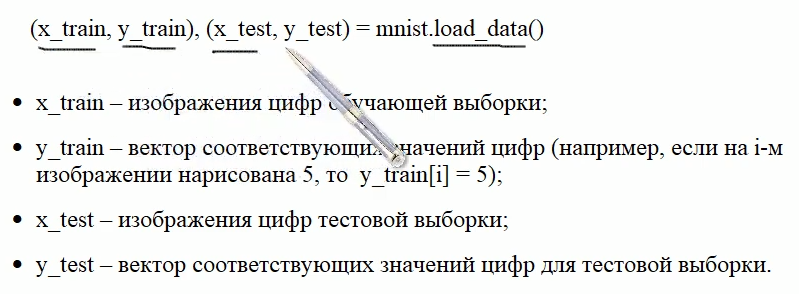

In [ ]:
# load_data() - метод для загрузки выборки
# каждое изображение имеет размер 28х28 и представлено в градациях серого: 0 - черный, 255 -белый

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


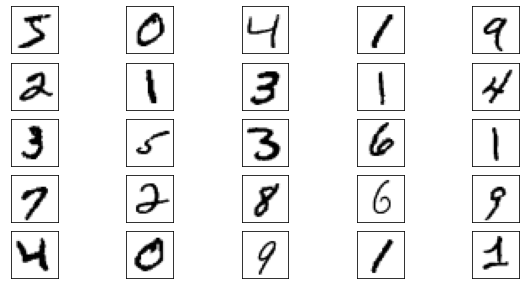

In [20]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary) # cmap - задаем палитру. cm.binary - ч.б

plt.show()

In [ ]:
# Создаем многослойную сеть
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
# Выводим параметры сети (слои и тд)
print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2877 - accuracy: 0.9187 - val_loss: 0.1588 - val_accuracy: 0.9557
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1293 - accuracy: 0.9627 - val_loss: 0.1194 - val_accuracy: 0.9633
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0885 - accuracy: 0.9734 - val_loss: 0.1012 - val_accuracy: 0.9703
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0676 - accuracy: 0.9797 - val_loss: 0.0904 - val_accuracy: 0.9744
Epoch 5/5
1/1 [==============================] - 0s 78ms/step
[[8.3130303e-09 1.4825340e-05 9.9998510e-01 7.4429913e-08 1.5128310e-15
  2.1956574e-09 8.3698876e-10 5.0122741e-14 2.9671355e-08 1.5820043e-12]]


In [22]:
res.val_accuracy()

AttributeError: ignored

In [10]:
print( np.argmax(res) )

2


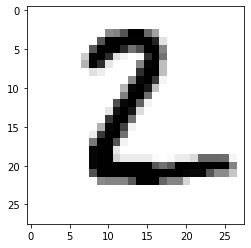

In [11]:
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [12]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

313/313 [==============================] - 1s 2ms/step
(10000,)


In [23]:
# Предсказанные моделью цифры
print(pred[:30])

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [24]:
# Фактические цифры
print(y_test[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [25]:

# Выделение неверных вариантов
mask = pred == y_test
print(mask[:30])


[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


AttributeError: ignored

In [16]:

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)


(296, 28, 28)


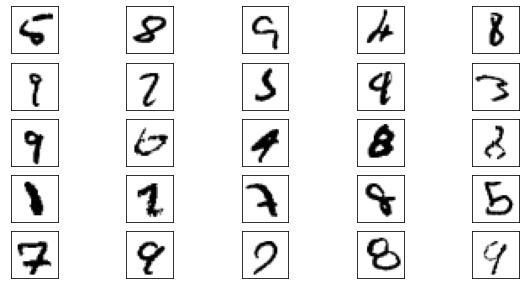

In [17]:

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()